In [1]:
import os
os.chdir(r"C:\Users\colli\OneDrive\Documents\Parkinsons Project Regis")
import pandas as pd
import glob

In [2]:
subjects = pd.read_csv('subjects.csv')

In [3]:
events = pd.read_csv('events.csv')

In [4]:
tasks = pd.read_csv('tasks.csv')

In [5]:
daily = pd.read_csv('daily_metadata.csv')

In [6]:
meta = pd.read_csv('tdcsfog_metadata.csv')

In [7]:
defog = pd.read_csv('defog_metadata.csv')

In [8]:
sub = pd.read_csv('sample_submission.csv')

In [9]:
train = glob.glob('train/**/**')

In [10]:
def reader(f):
    df = pd.read_csv(f)
    df['Id'] = f.split('\\\\')[-1].split('.')[0]
    return df
# read train data
train = pd.concat([reader(f) for f in train]).fillna(0); print(train.shape)
cols = [c for c in train.columns if c not in ['Id', 'StartHesitation', 'Turn' , 'Walking', 'Valid', 'Task','Event']] # except categorical and target fetaure

(30839488, 11)


In [11]:
train.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id,Event
0,0,-1.0,0.044129,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0
1,1,-1.0,0.034431,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0
2,2,-1.0,0.031250,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0
3,3,-1.0,0.031250,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0
4,4,-1.0,0.031250,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30839488 entries, 0 to 4224
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int64  
 1   AccV             float64
 2   AccML            float64
 3   AccAP            float64
 4   StartHesitation  float64
 5   Turn             float64
 6   Walking          float64
 7   Valid            object 
 8   Task             object 
 9   Id               object 
 10  Event            float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.8+ GB


In [13]:
train.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Event
count,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07
mean,8.104209e+04,-2.853547e+00,-7.176152e-02,3.223149e-01,9.899321e-03,7.286266e-02,9.735538e-03,1.623244e-04
std,7.757087e+04,3.555443e+00,6.220057e-01,1.384934e+00,9.900164e-02,2.599109e-01,9.818736e-02,1.273962e-02
min,0.000000e+00,-3.552112e+01,-2.616440e+01,-4.782964e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.345600e+04,-1.062500e+00,-1.440556e-01,-3.021181e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.209300e+04,-9.700277e-01,-3.125000e-02,-1.068925e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.247820e+05,-9.169647e-01,6.805153e-02,3.267068e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.434950e+05,2.090695e+01,2.748472e+01,3.033769e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
cols = ['Valid', 'Task']
train[cols] = train[cols].astype('category')

In [17]:
cols1 = ['AccV', 'AccML','AccAP','StartHesitation','Turn','Walking','Event',]
train[cols1] = train[cols1].astype('float16')

In [18]:
train['Time'] = train['Time'].astype('int8')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30839488 entries, 0 to 4224
Data columns (total 11 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Time             int8    
 1   AccV             float16 
 2   AccML            float16 
 3   AccAP            float16 
 4   StartHesitation  float16 
 5   Turn             float16 
 6   Walking          float16 
 7   Valid            category
 8   Task             category
 9   Id               object  
 10  Event            float16 
dtypes: category(2), float16(7), int8(1), object(1)
memory usage: 970.6+ MB


In [24]:
subjects.head()

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.0,63,M,3.0,30.0,NaN,0
1,05595e,1.0,56,M,8.0,28.0,NaN,0
2,0967b2,1.0,59,M,10.0,38.0,48.0,19
3,0967b2,2.0,59,M,10.0,37.0,44.0,13
4,097078,NaN,70,F,10.0,27.0,50.0,20


In [27]:
subjects.isnull().sum()

Subject          0
Visit           62
Age              0
Sex              0
YearsSinceDx     0
UPDRSIII_On      1
UPDRSIII_Off    41
NFOGQ            0
dtype: int64

In [25]:
import seaborn as sns

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

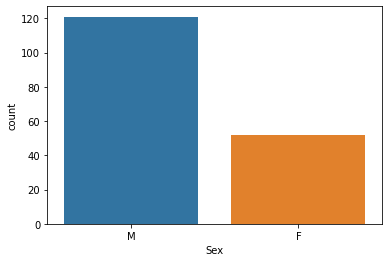

In [42]:
#EDA Subjects data
sns.countplot(subjects['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

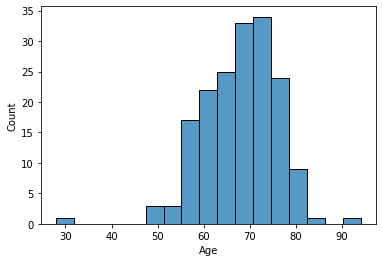

In [33]:
sns.histplot(subjects['Age'])

<AxesSubplot:xlabel='YearsSinceDx', ylabel='Count'>

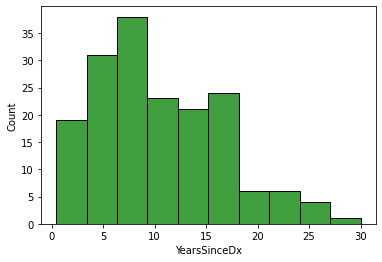

In [35]:
sns.histplot(subjects['YearsSinceDx'], color = 'green')

<AxesSubplot:xlabel='UPDRSIII_On', ylabel='Count'>

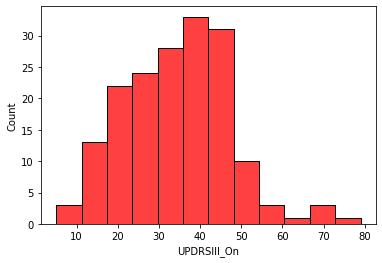

In [36]:
sns.histplot(subjects['UPDRSIII_On'], color = 'red')

<AxesSubplot:xlabel='UPDRSIII_Off', ylabel='Count'>

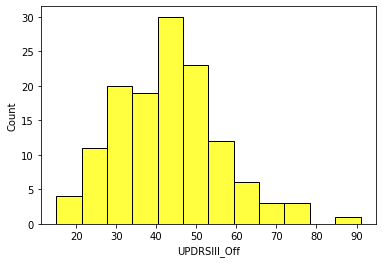

In [38]:
sns.histplot(subjects['UPDRSIII_Off'], color = 'yellow')

In [39]:
tasks.head()

,Id,Begin,End,Task
0,02ab235146,10.00,190.48,Rest1
1,02ab235146,211.24,271.56,Rest2
2,02ab235146,505.88,522.40,4MW
3,02ab235146,577.96,594.64,4MW-C
4,02ab235146,701.32,715.28,MB1


In [40]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2817 non-null   object 
 1   Begin   2817 non-null   float64
 2   End     2817 non-null   float64
 3   Task    2817 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.2+ KB


In [44]:
tasks['Task'].unique()

array(['Rest1', 'Rest2', '4MW', '4MW-C', 'MB1', 'MB2a', 'MB2b', 'MB3-R',
       'MB3-L', 'MB4', 'MB5', 'MB6-R', 'MB6-L', 'MB7', 'MB8', 'MB9',
       'MB10', 'MB11', 'MB12', 'MB13', 'TUG-ST', 'TUG-DT', 'TUG-C',
       'Turning-ST', 'Turning-DT', 'Turning-C', 'Hotspot1', 'Hotspot1-C',
       'Hotspot2', 'Hotspot2-C', 'MB6'], dtype=object)

In [45]:
defog.head()

,Id,Subject,Visit,Medication
0,02ab235146,ab54e1,2,on
1,02ea782681,bf608b,2,on
2,06414383cf,c0b71e,2,off
3,092b4c1819,b6a627,1,off
4,0a900ed8a2,b7bd52,2,on


C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Visit', ylabel='count'>

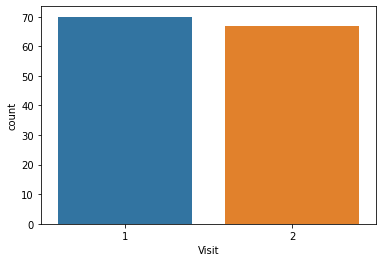

In [49]:
sns.countplot(defog['Visit'])

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medication', ylabel='count'>

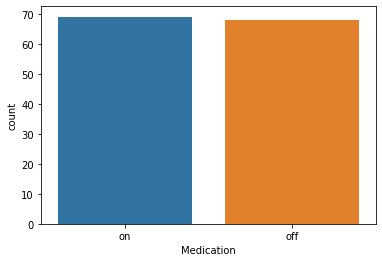

In [50]:
sns.countplot(defog['Medication'])

In [51]:
meta.head()

,Id,Subject,Visit,Test,Medication
0,003f117e14,13abfd,3,2,on
1,009ee11563,d81e3a,4,2,on
2,011322847a,203e85,2,2,on
3,01d0fe7266,203e85,2,1,off
4,024418ba39,cecfb8,19,3,on
